In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [103]:
male=pd.get_dummies(data['sex'],drop_first=True).astype(int)
Smoker=pd.get_dummies(data['smoker'],drop_first=True).astype(int)
Region= pd.get_dummies(data['region'],drop_first=True)
data=pd.concat([data,male,Smoker,Region],axis=1)
data.head()



,age,sex,bmi,children,smoker,region,expenses,male,yes,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,False,False,True
1,18,male,33.8,1,no,southeast,1725.55,1,0,False,True,False
2,28,male,33.0,3,no,southeast,4449.46,1,0,False,True,False
3,33,male,22.7,0,no,northwest,21984.47,1,0,True,False,False
4,32,male,28.9,0,no,northwest,3866.86,1,0,True,False,False


In [104]:
data.rename(columns={'yes':'Smoker'},inplace=True)

<Axes: xlabel='region', ylabel='expenses'>

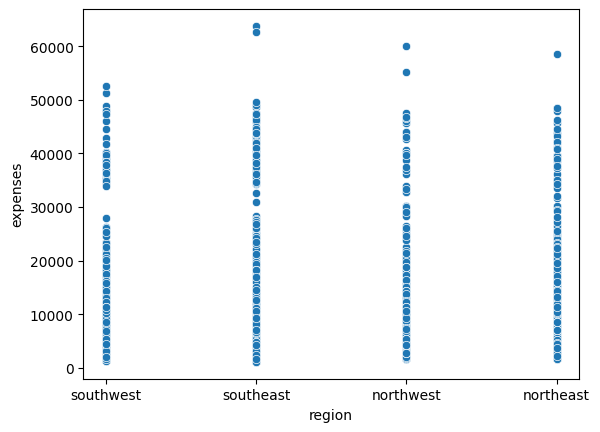

In [105]:
sns.scatterplot(x='region',y='expenses',data=data)

,age,sex,bmi,children,smoker,region,expenses,male,Smoker,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,False,False,True
1,18,male,33.8,1,no,southeast,1725.55,1,0,False,True,False
2,28,male,33.0,3,no,southeast,4449.46,1,0,False,True,False
3,33,male,22.7,0,no,northwest,21984.47,1,0,True,False,False
4,32,male,28.9,0,no,northwest,3866.86,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0,True,False,False
1334,18,female,31.9,0,no,northeast,2205.98,0,0,False,False,False
1335,18,female,36.9,0,no,southeast,1629.83,0,0,False,True,False
1336,21,female,25.8,0,no,southwest,2007.95,0,0,False,False,True


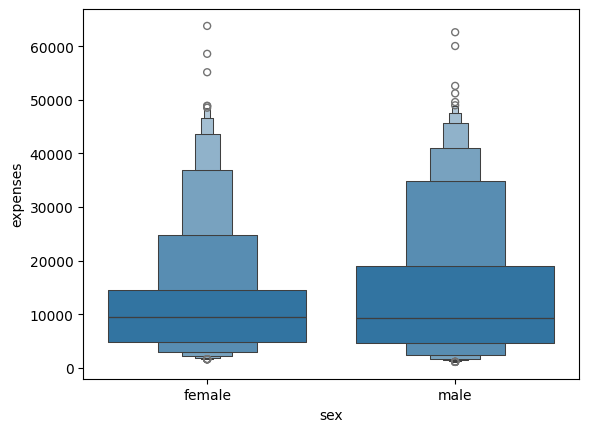

In [106]:
sns.boxenplot(x='sex',y='expenses',data=data)
data

<Axes: xlabel='sex', ylabel='expenses'>

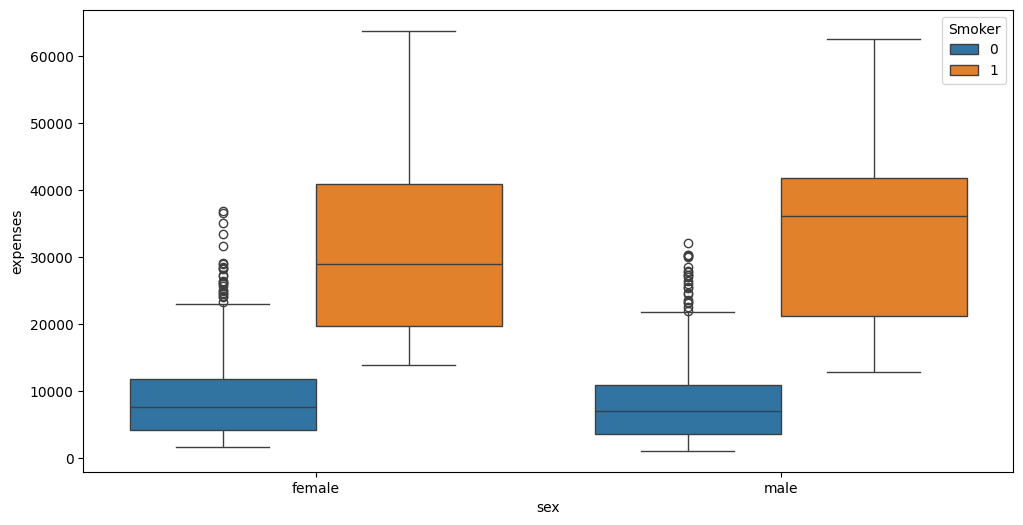

In [107]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y='expenses',data=data,hue='Smoker')

<Axes: xlabel='bmi', ylabel='expenses'>

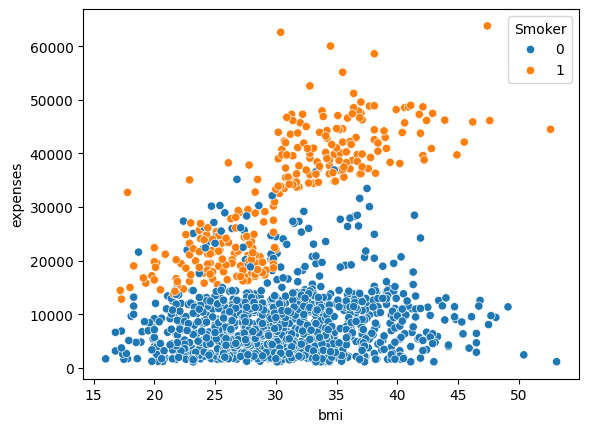

In [108]:
sns.scatterplot(x='bmi',y='expenses',data=data,hue='Smoker')

<Axes: xlabel='bmi', ylabel='expenses'>

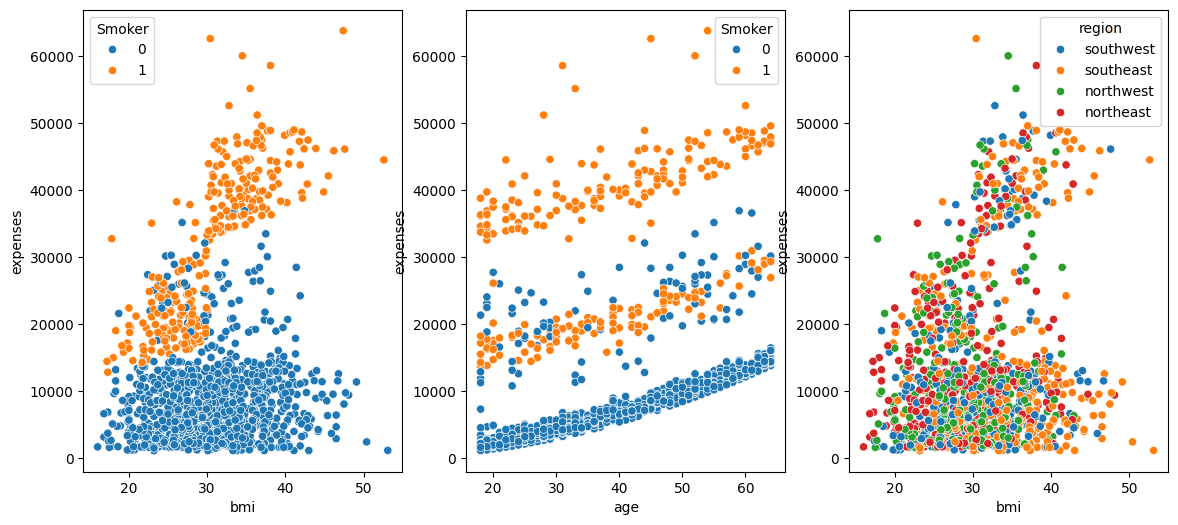

In [109]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(14,6))
sns.scatterplot(x='bmi',y='expenses',data=data,hue='Smoker',ax=ax[0])
sns.scatterplot(x='age',y='expenses',data=data,hue='Smoker',ax=ax[1])
sns.scatterplot(x='bmi',y='expenses',data=data,hue='region',ax=ax[2])


In [110]:
data.drop(['sex','region','smoker'],inplace=True,axis=1)
data.head()

,age,bmi,children,expenses,male,Smoker,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,False,False,True
1,18,33.8,1,1725.55,1,0,False,True,False
2,28,33.0,3,4449.46,1,0,False,True,False
3,33,22.7,0,21984.47,1,0,True,False,False
4,32,28.9,0,3866.86,1,0,True,False,False


<Axes: >

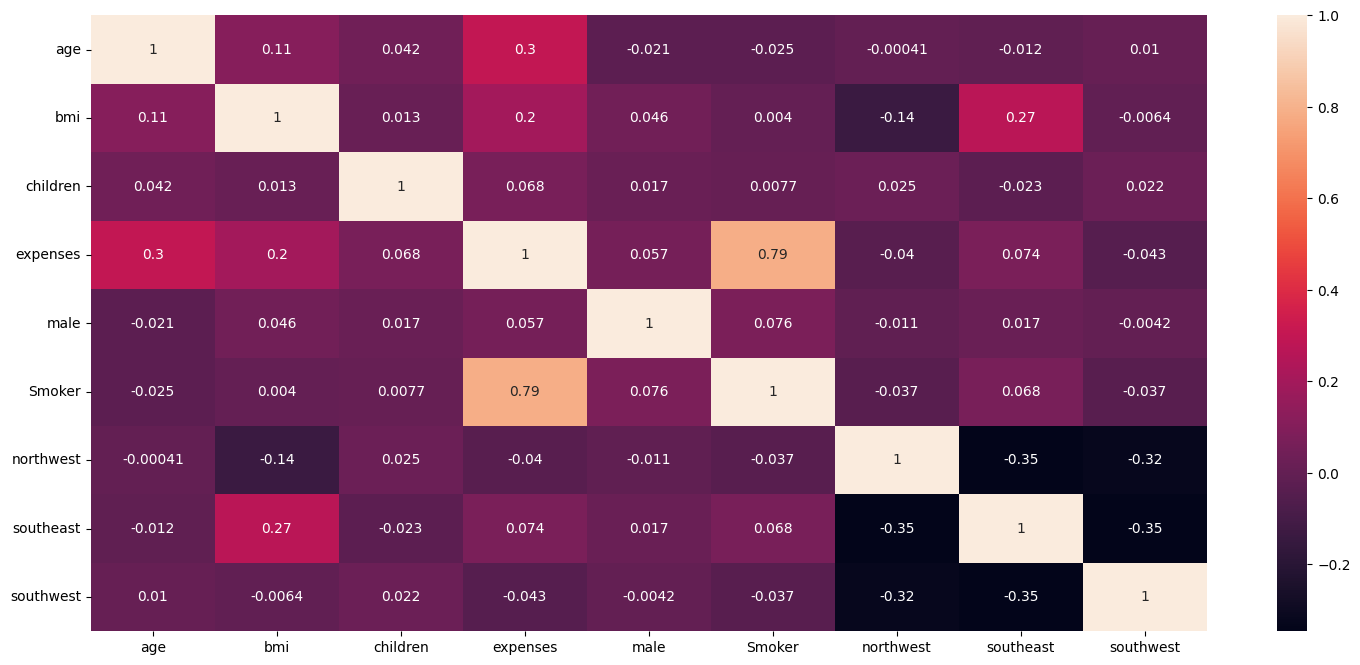

In [111]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True)

In [112]:
x=data.drop(['expenses'],axis=1)
y=data['expenses']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler=StandardScaler()
scal_x_train=scaler.fit_transform(x_train)
scal_x_test=scaler.transform(x_test)

In [117]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(scal_x_train,y_train)

SVR()

In [118]:
prdi=regressor.predict(scal_x_test)